In [5]:
options(warn = -1, scipen = 999)
pacotes <- c("dplyr","tidyr","tidyquant")
for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
}

In [80]:
acoes <- c("ABEV3.SA","AZUL4.SA","B3SA3.SA","BBDC3.SA",
           "BBDC4.SA","BBSE3.SA","BEEF3.SA","BPAC11.SA",
           "BRAP4.SA","BRDT3.SA","BRFS3.SA","BRKM5.SA",
           "BRML3.SA","BTOW3.SA","CCRO3.SA","CIEL3.SA",
           "CMIG4.SA","COGN3.SA","CPFE3.SA","CRFB3.SA",
           "CSAN3.SA","CVCB3.SA","CYRE3.SA","ECOR3.SA",
           "EGIE3.SA","ELET3.SA","ELET6.SA","EMBR3.SA",
           "ENBR3.SA","ENGI11.SA","EQTL3.SA","FLRY3.SA",
           "GGBR4.SA","GNDI3.SA","GOAU4.SA","GOLL4.SA",
           "HAPV3.SA","HGTX3.SA","HYPE3.SA","IGTA3.SA",
           "IRBR3.SA","ITSA4.SA","ITUB4.SA","JBSS3.SA",
           "KLBN11.SA","LAME4.SA","LREN3.SA","MGLU3.SA",
           "MRFG3.SA","MRVE3.SA","MULT3.SA","NTCO3.SA",
           "PCAR3.SA","PETR3.SA","PETR4.SA","QUAL3.SA",
           "RADL3.SA","RAIL3.SA","RENT3.SA","SANB11.SA",
           "SBSP3.SA","SULA11.SA","SUZB3.SA","TAEE11.SA",
           "TIMP3.SA","TOTS3.SA","UGPA3.SA","USIM5.SA",
           "VALE3.SA","VIVT4.SA","VVAR3.SA","WEGE3.SA"
          )

In [101]:
precos <- tq_get(acoes, from = Sys.Date()-365)
precos_mat <- precos %>%
  group_by(date, symbol) %>%
  summarise(close) %>%
  spread(key = symbol, value = close)
precos_mat[,1] <- NULL
precos_mat <- as.matrix(precos_mat)
for(i in 1:ncol(precos_mat)){
  precos_mat[,i] <- precos_mat[,i]/precos_mat[1,i]
}

`summarise()` regrouping output by 'date' (override with `.groups` argument)



In [102]:
first <- dplyr::first(precos$date)

In [103]:
ibov <- tq_get("^BVSP", from = first) %>%
  group_by(date, symbol) %>%
  summarise(close) %>%
  spread(key = symbol, value = close)
ibov <- ibov[,2] %>% as.matrix
ibov <- ibov/ibov[1]

`summarise()` regrouping output by 'date' (override with `.groups` argument)



In [143]:
n_sim <- 3000
n_acoes <- 5
acoes_s <- matrix(0, nrow = n_acoes, ncol = n_sim)
for(i in 1:ncol(acoes_s)){
  acoes_s[,i] <- sample(1:length(acoes), n_acoes)
}

In [144]:
carteiras <- matrix(0,nrow = nrow(precos_mat), ncol = n_sim)
pesos <- matrix(0,n_acoes,n_sim)
pesos <- apply(pesos,2,rexp,0.001)
pesos <- apply(pesos,2,function(x)x/sum(x))

In [145]:
for(i in 1:nrow(carteiras)){
  for(j in 1:ncol(carteiras)){
    carteiras[i,j] <- sum(precos_mat[i,acoes_s[,j]]*pesos[,j])
  }
}

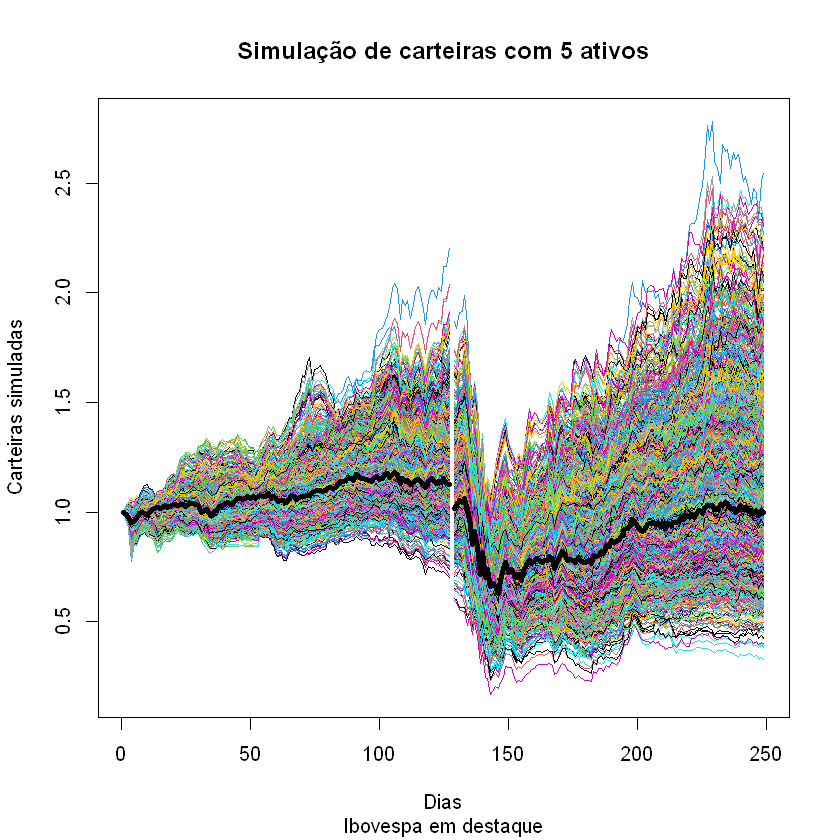

In [149]:
matplot(carteiras, type = "l", lty = 1, col = 1:n_sim, xlab = "Dias", ylab = "Carteiras simuladas",
       main = paste("Simulação de carteiras com",n_acoes,"ativos"), sub = "Ibovespa em destaque")
lines(ibov, lwd = 4)

In [147]:
carteiras_s <- na.fill(carteiras,0)
maior <- carteiras_s[nrow(carteiras_s),] == max(carteiras_s[nrow(carteiras_s),])

In [148]:
p <- round(pesos[,maior]*100,2)
a <- acoes_s[,maior]
a <- acoes[a]
names(p) <- a
print(p)

UGPA3.SA VVAR3.SA WEGE3.SA PETR3.SA BRAP4.SA 
    4.34    87.41     1.53     0.96     5.76 
